In [27]:
# Intern allows us to access boss resources https://docs.theboss.io/docs/getting-started-intern
# You do not need to modify this cell, it will connect to the bossdb for you. 
from intern.remote.boss import BossRemote
from intern.resource.boss.resource import *
import numpy as np
import configparser
import matplotlib.pyplot as plt

# Setup and connection parameters
connection_params={
    'protocol':'https',
    'host':'api.bossdb.io',
    'token':'public' #allows read access to the general public
}

# Dataset dimensions are z:[0,720], y:[0,1420], x:[0,5805]
# Data beyond these ranges will be padded with 0 values
#BossDB access uses an [inclusive_index,exclusive_index] format, so [0,10] specifies 10 index values 0-9
data_params={
    'prasad_coll':'prasad',
    'prasad_exp' : 'prasad2020',
    'prasad_channel' : 'image',
    'pixel_annotation_channel': 'pixel_annotation',
    'roi_channel': 'region_of_interest',
    'roi_interp_channel': 'roi_interpolated',
    'prasad_coord' : 'prasad_prasad2020',
    'prasad_res' : 0, #Native resolution of dataset is 1.17um, 1.17um, 1.17um per voxel=
}

#create connection objects
rmt = BossRemote(connection_params)
chan_raw = ChannelResource(data_params['prasad_channel'], data_params['prasad_coll'], data_params['prasad_exp'],
                             'annotation', datatype='uint8', sources=data_params['prasad_channel'])
chan_pixel = ChannelResource(data_params['pixel_annotation_channel'], data_params['prasad_coll'], data_params['prasad_exp'],
                             'annotation', datatype='uint64', sources=data_params['prasad_channel'])
chan_roi_interp = ChannelResource(data_params['roi_interp_channel'], data_params['prasad_coll'], data_params['prasad_exp'],
                             'annotation', datatype='uint64', sources=data_params['prasad_channel'])

In [28]:
#Change Xrange, Yrange, ZRange here, and the value of region to see other areas

#Pull a large volume, mask out only the target region of interest
#Combine this with the pixel level annotations
#Display a slice
#Several z slices were manually annotated to indicate Regions of interest
#    Labels
#    "Clear Label" = 0
#    "cortex" = 1
#    "striatum" = 2
#    "trn" = 3
#    "vp" = 4
#    "zona incerta" = 5
#    "internal capsule" = 6
#    "hypothalamus" = 7
#    "corpus callosun" = 8
# Pixel level annotations
#    background = 0
#    blood vessel = 1
#    cell = 2
#    myelinated axon (white matter) = 3

region = 2

#Striatum examples
#Pixel annotations for striatum
# xrange=[3700,3957]
# yrange=[500,757]
# zrange=[110,471]

#Boundaries example
xrange = [3000,4500]
yrange = [400,900]
#The valid z values for the interpolation are z=117 to 460
zrange = [150,300]

#Get the ROI Annotation from bossDB
raw_cutout_data = rmt.get_cutout(chan_raw, data_params['prasad_res'], xrange,
                                 yrange, zrange)
#Get the ROI Annotation from bossDB
roi_cutout_data = rmt.get_cutout(chan_roi_interp, data_params['prasad_res'], xrange,
                                 yrange, zrange)

#Get the ROI Annotation from bossDB
anno_cutout_data = rmt.get_cutout(chan_pixel, data_params['prasad_res'], xrange,
                                 yrange, zrange)

#Use ROI as a mask
raw_cutout_data[roi_cutout_data!=region] = 0 #zero out data that is not striatum
anno_cutout_data[roi_cutout_data!=region] = 0 #zero out data that is not striatum
print(np.max(anno_cutout_data))
print(anno_cutout_data.shape)

3.0
(150, 500, 1500)


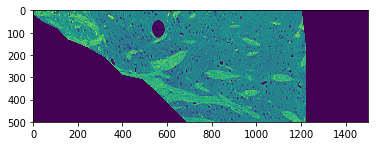

In [29]:
#Plot raw data after mask
plt.imshow(np.squeeze(raw_cutout_data[20,:,:]))

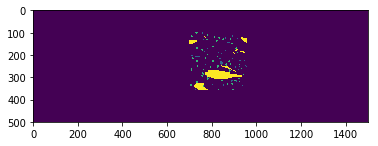

In [30]:
#Plot annotation data after mask
plt.imshow(np.squeeze(anno_cutout_data[20,:,:]/3.0))